**Algoritmo K-NN con sklearn**


**Fecha:** 18-nov-2020

**Desarrollado por:** José Miguel Llanos M

**Asignatura:** Minería de Datos

**Basado del libro:** Aprende Machine Learning del autor Juan Ignacio Begnato



**Paso 1: Importar las librerias**

In [25]:
# Permite crear vectores y matrices miltidimensionales 
# y una colección de funciones matemáticas
import numpy as np
# Permite manipular y analizar los datos (tablas numéricas y series temporales)
import pandas as pd
# Genera de gráficos a partir de datos contenidos en listas o arrays
import matplotlib.pyplot as plt

# Divide un dataset en dos bloques, uno para el entrenamiento y el otro para pruebas
from sklearn.model_selection import train_test_split
# Permite normalizar los datos
from sklearn.preprocessing import MinMaxScaler
# Es el algoritmo de clasificación K-NN
from sklearn.neighbors import KNeighborsClassifier
# Genera la matriz de confusión
from sklearn.metrics import confusion_matrix
# Gerera el reporte de la clasificación
from sklearn.metrics import classification_report


**Paso 2: Cargamos los datos**

In [26]:
data = pd.read_csv("data/reviews.csv", sep=";")
data.head(257)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


**Paso 3: Generar las estadísticas**

In [27]:
# La función describe(), permite obtener elementos estadísticos de los datos
data.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


**Paso 4: Visualizar los datos, con la gráfica de histograma**

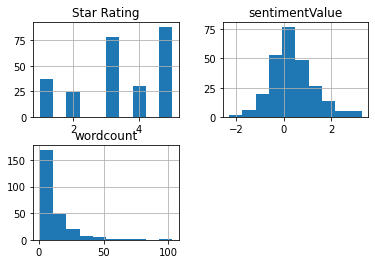

In [28]:
data.hist()
plt.show()

**Paso 5: Observar los registros de la etiqueta (Star Rating)**

In [29]:
# La función groupby(), permite agrupar elementos del dataframe
data.groupby('Star Rating').size()

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64

**Paso 6: Crear el set de entrenamiento y prueba**

In [30]:
# Se definen los valores de las caracteristicas
X = data[['wordcount','sentimentValue']].values
# Se definen los valores de la etiqueta
y = data['Star Rating'].values

# Se dividen los datos para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Se normalizan los datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Paso 7: Usar K-NN con sklearn**

In [31]:
# Definimos la cantidad de vecinos más cercanos
K = 7

# Utilizamos el algoritmo definido por sklearn
knn = KNeighborsClassifier(K)
# Se entrena el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)
# Se imprime el score de los datos de entrenamiento
print('Puntuació entrenamiento:', knn.score(X_train, y_train))
# Se imprime el score de los datos de prueba
print('Puntuación prueba:', knn.score(X_test, y_test))

Puntuació entrenamiento: 0.8958333333333334
Puntuación prueba: 0.8615384615384616


**Paso 8: Generar la matriz de confusión y la precisión del modelo**

In [32]:
pred = knn.predict(X_test)
# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65

